In [45]:
import pandas as pd

In [46]:
data=pd.read_csv(r"D:\Machine_Learning\interview\end_to_end_implementation\bank_data\bank-full - Copy.csv",sep=";")

In [47]:
def months(m):
    if m in ["jan","feb","mar"]:
        return "q1"
    elif m in ["apr","may","jun"]:
        return "q2"
    elif m in ["jul","aug","sep"]:
        return "q3"
    else:
        return "q4"

In [48]:
data["quaterly"]=data["month"].apply(lambda x:months(x))

In [49]:
data.shape

(45211, 18)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  quaterly   45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [51]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
quaterly     0
dtype: int64

In [52]:
import sweetviz
my_report=sweetviz.analyze([data,"train"],target_feat='y')

                                             |     | [  0%]   00:00 -> (? left)

In [53]:
my_report.show_html("Report.html")

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  quaterly   45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [55]:
import seaborn as sb
import matplotlib.pyplot as plt

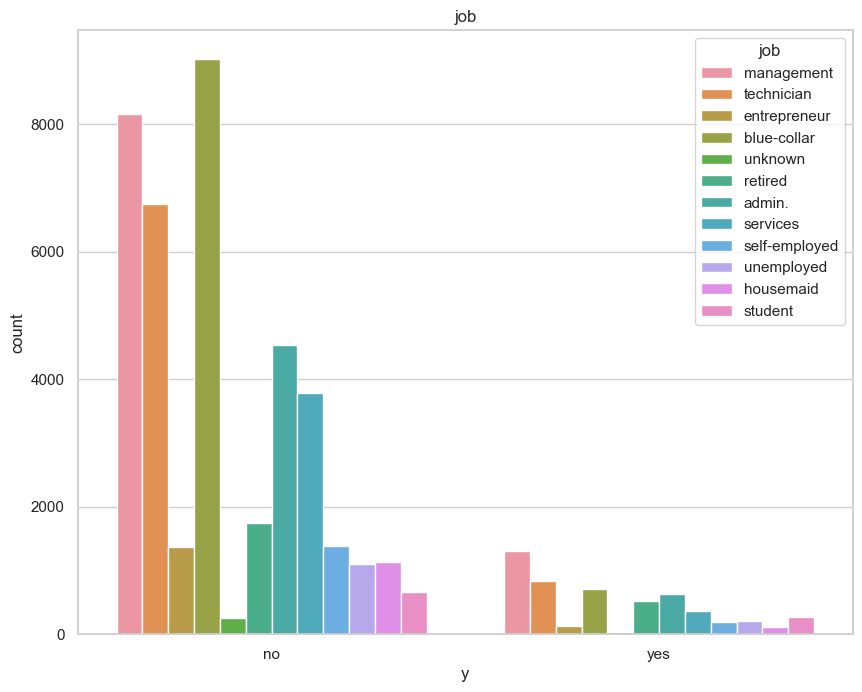

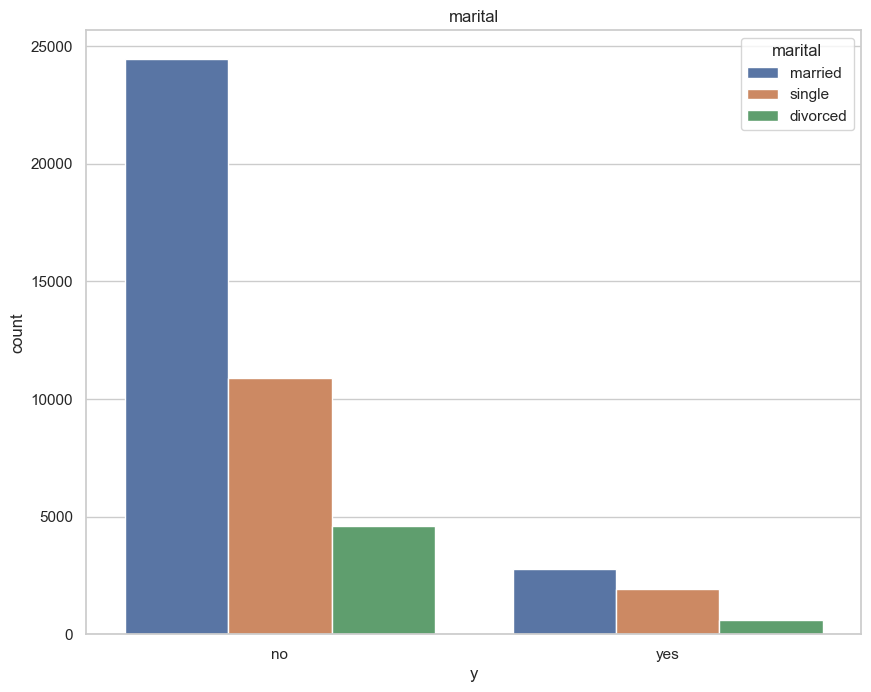

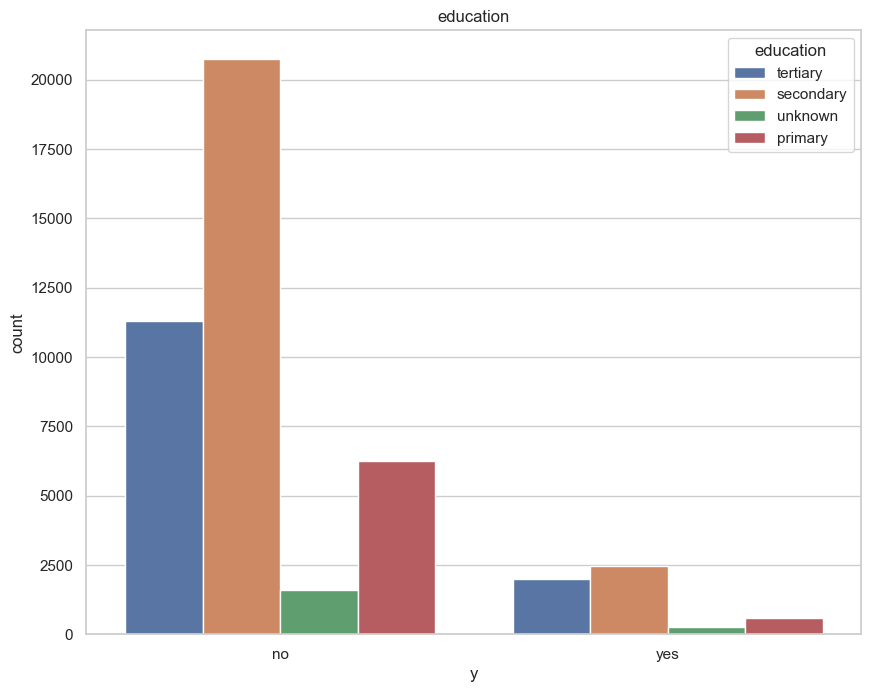

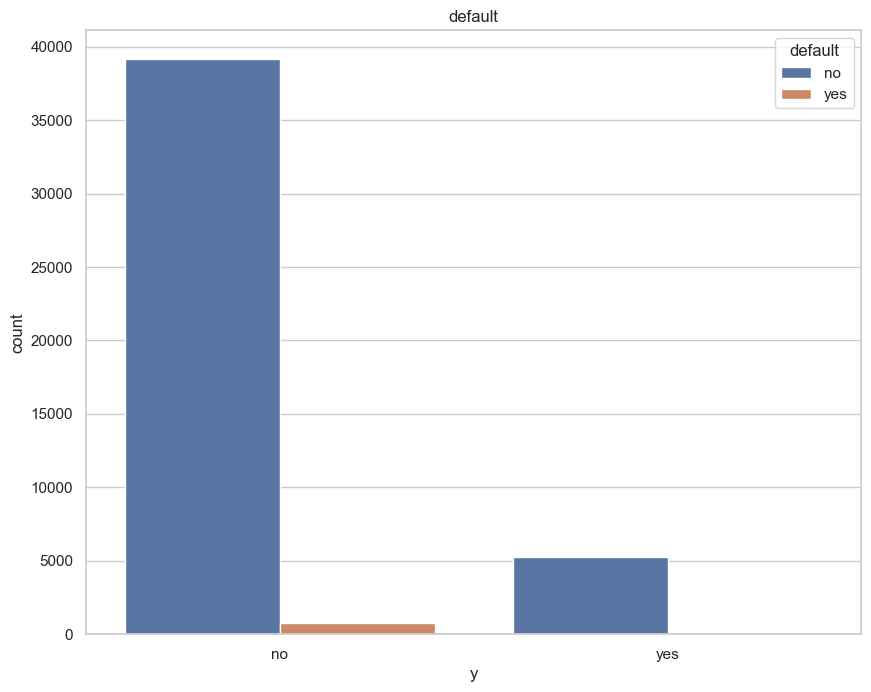

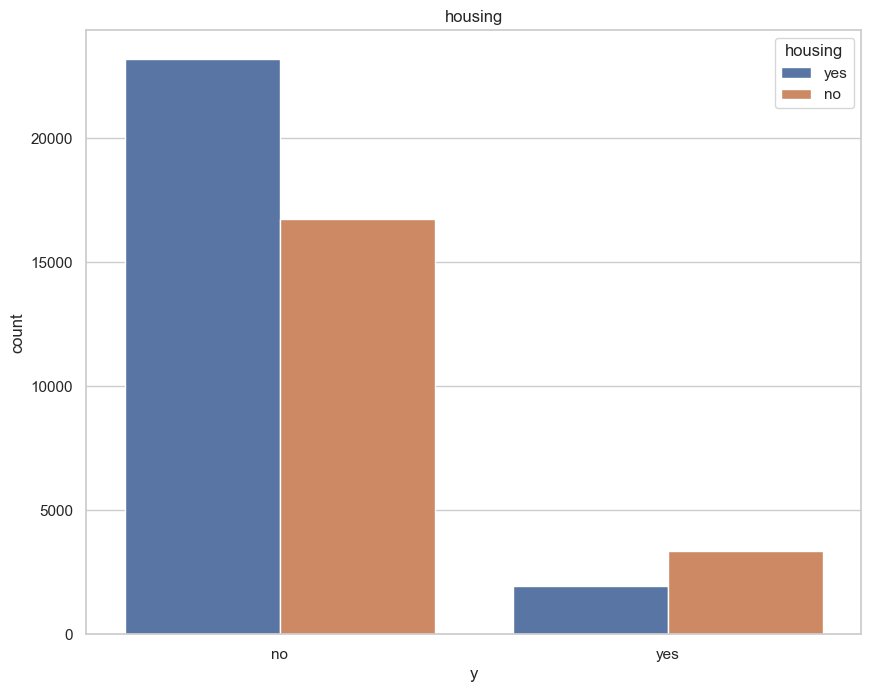

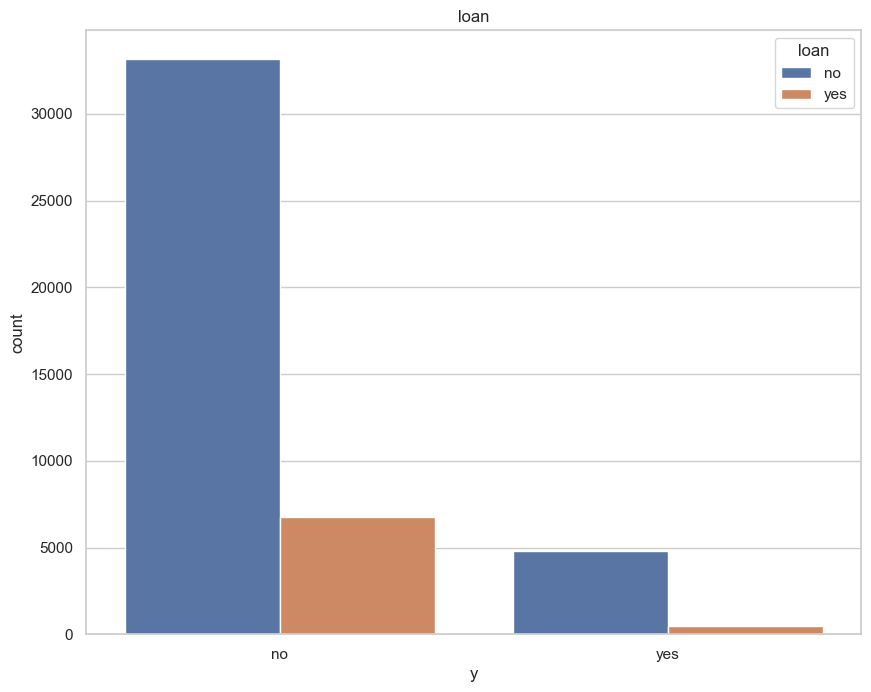

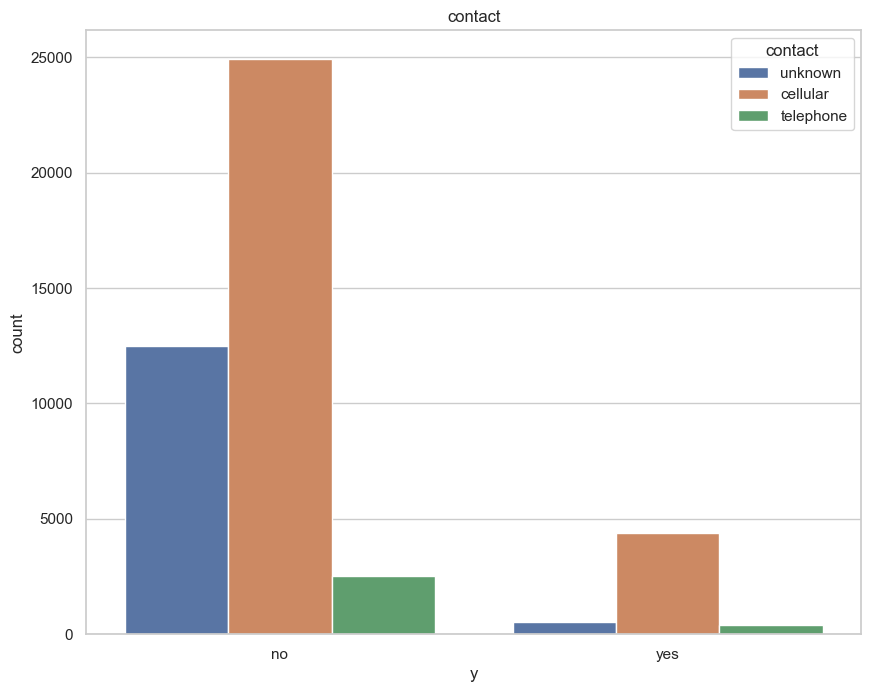

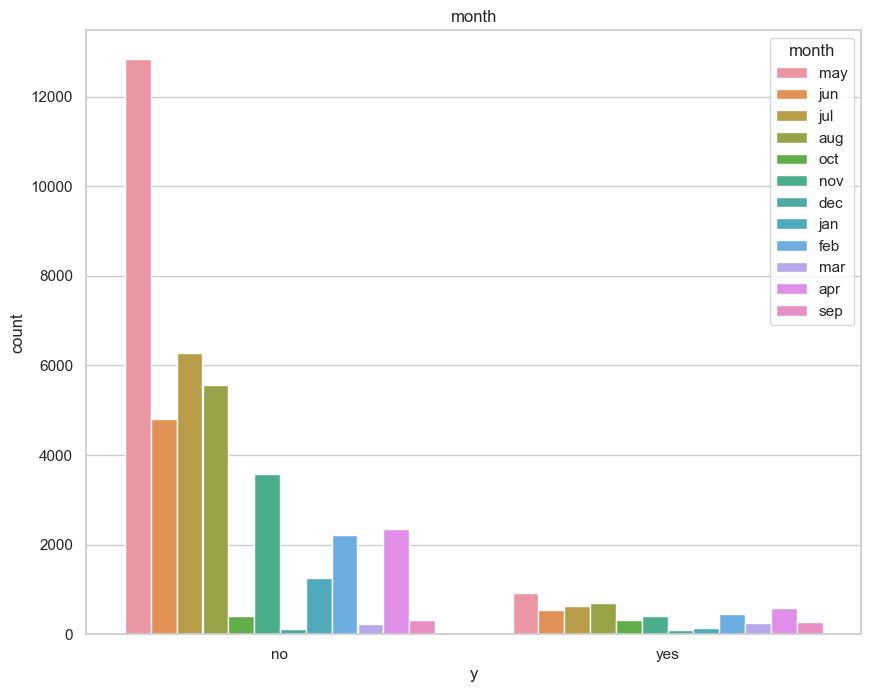

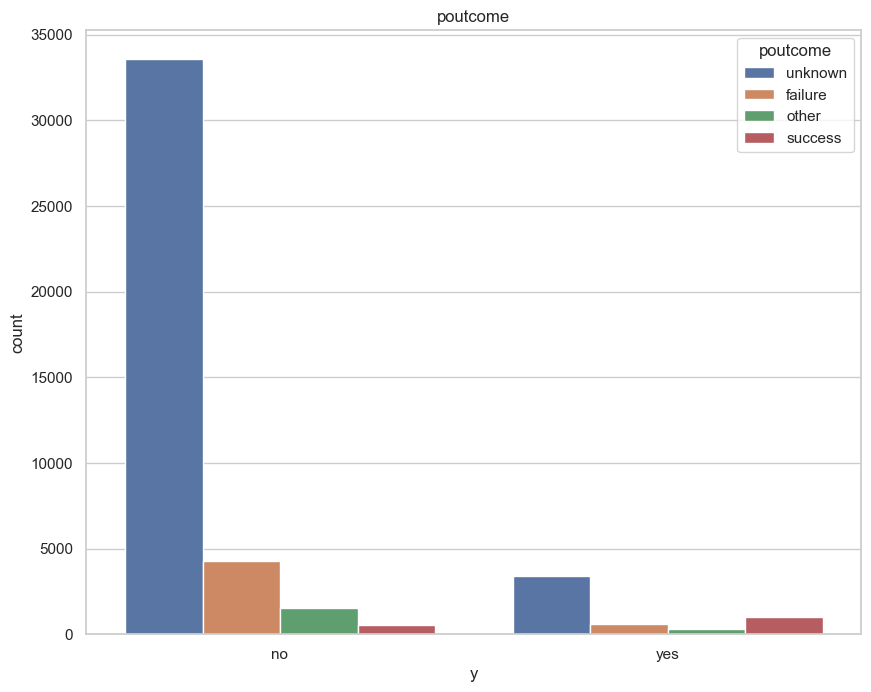

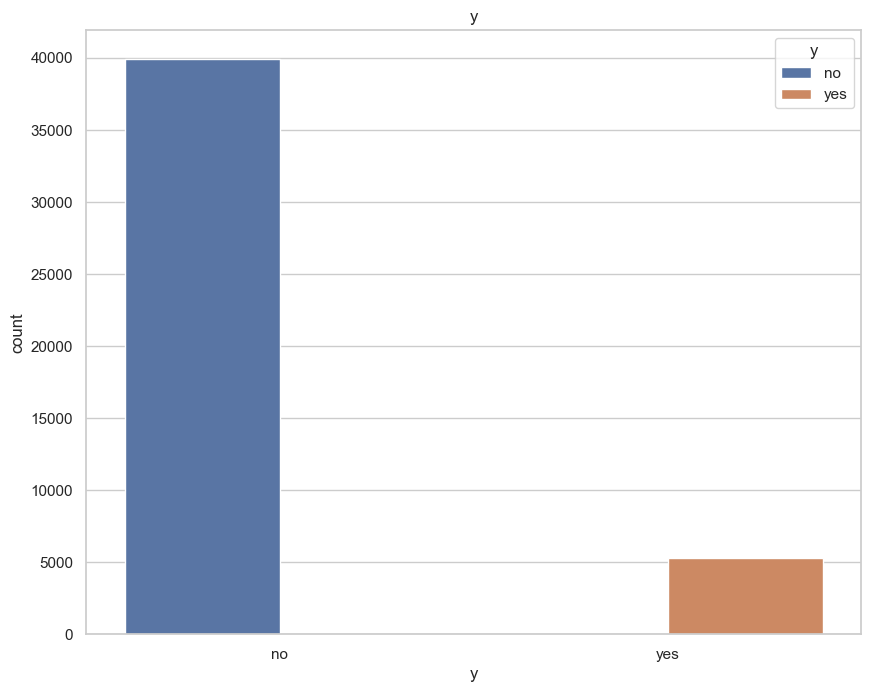

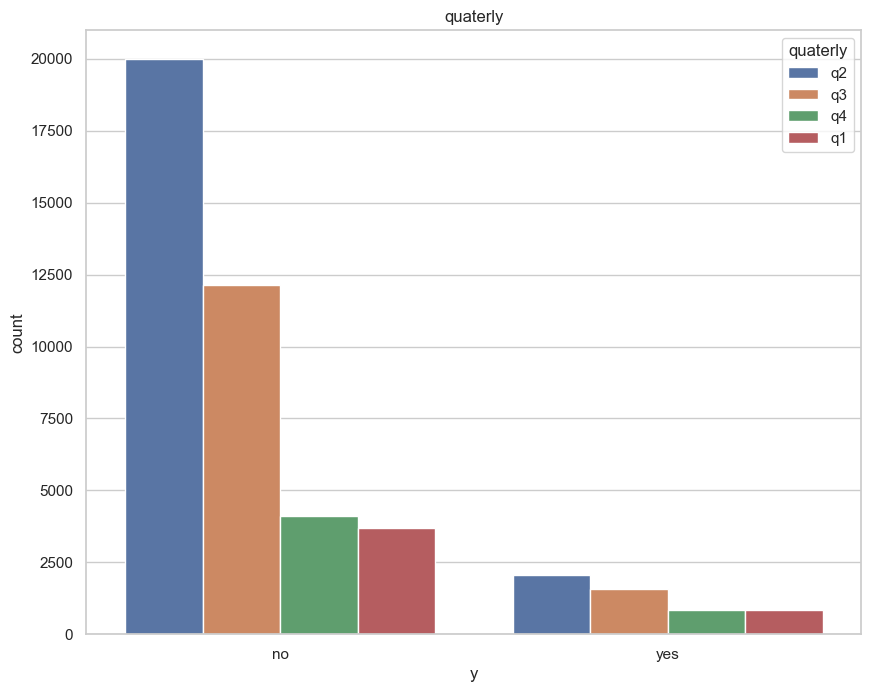

In [56]:
for i in data.select_dtypes(include ='object'):
    plt.figure(figsize=(10,8))
    sb.set_theme(style="whitegrid")
    sb.countplot(x=data.y,hue=data[i]).set(title=i)

In [57]:
import scipy.stats as stats
from scipy.stats import chi2
for i in data.select_dtypes(include ='object'):
    dataset_table=pd.crosstab(data[i],data['y'])
    observed=dataset_table.values
    val2=stats.chi2_contingency(dataset_table)
    expected=val2[3]
    chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    p_value=1-chi2.cdf(x=chi_square_statistic,df=val2[2])
    if p_value<=0.01:
          print("y and "+i+" Dependent",p_value)

    else:
          print("y and "+i+" InDependent")

y and job Dependent 0.0
y and marital Dependent 0.0
y and education Dependent 0.0
y and default Dependent 1.8706589343109314e-06
y and housing Dependent 0.0
y and loan Dependent 0.0
y and contact Dependent 0.0
y and month Dependent 0.0
y and poutcome Dependent 0.0
y and y Dependent 0.0
y and quaterly Dependent 0.0


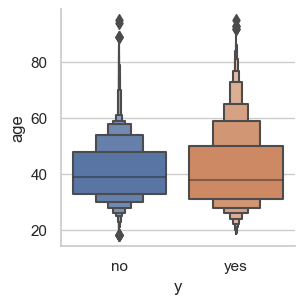

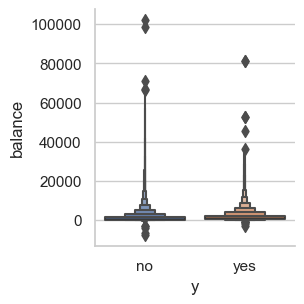

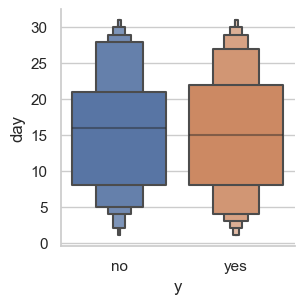

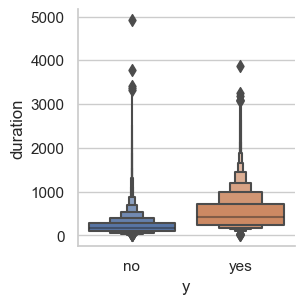

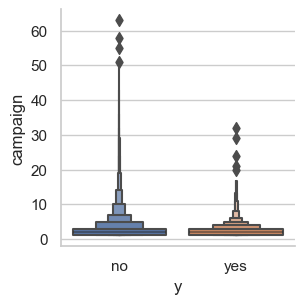

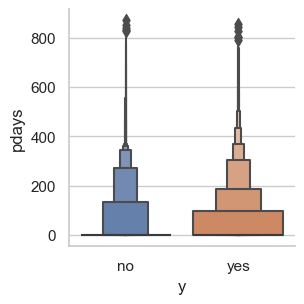

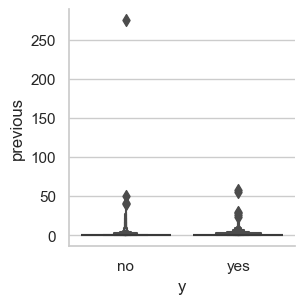

In [58]:
for i in data.select_dtypes(include="int64"):
    sb.catplot(y = i, x = 'y', data = data.sort_values(i, ascending = False), kind="boxen", height = 3, aspect = 1)
    plt.show()

In [59]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in data.select_dtypes(include="int64"):
    model = ols(i+' ~ y', data=data.dropna()).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(i)
    
    p_value=anova_table["PR(>F)"][0]
    if p_value<=0.01:
          print("y and "+i+" Dependent",p_value)

    else:
          print("y and "+i+" InDependent",p_value)

age
y and age Dependent 8.825643691802687e-08
balance
y and balance Dependent 2.5211136918594683e-29
day
y and day Dependent 1.6538801608171055e-09
duration
y and duration Dependent 0.0
campaign
y and campaign Dependent 1.0123473642068786e-54
pdays
y and pdays Dependent 3.790553319447794e-108
previous
y and previous Dependent 7.801830349752427e-88


In [60]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,quaterly
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,q2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,q2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,q2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,q2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,q2


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  quaterly   45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [62]:
data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [63]:
df=data.copy(deep=True)

In [64]:
df["default"]=[0 if i=='no' else 1 for i in df["default"]]

In [65]:
df["housing"]=[0 if i=='no' else 1 for i in df["housing"]]

In [66]:
df["loan"]=[0 if i=='no' else 1 for i in df["loan"]]

In [67]:
df["y"]=[0 if i=='no' else 1 for i in df["y"]]

In [68]:
import numpy as np
for variable in ["job","marital","contact","poutcome"]:
    tmp = pd.DataFrame(df.groupby([variable])['y'].mean())
    print("tmp",tmp)
    tmp['non-target'] = 1 - tmp['y']
    print(tmp)
    tmp['ratio'] = np.log( tmp['y'] / tmp['non-target'] )
    dic=tmp['ratio'].to_dict()
    df[variable]=df[variable].map(dic)

tmp                       y
job                    
admin.         0.122027
blue-collar    0.072750
entrepreneur   0.082717
housemaid      0.087903
management     0.137556
retired        0.227915
self-employed  0.118429
services       0.088830
student        0.286780
technician     0.110570
unemployed     0.155027
unknown        0.118056
                      y  non-target
job                                
admin.         0.122027    0.877973
blue-collar    0.072750    0.927250
entrepreneur   0.082717    0.917283
housemaid      0.087903    0.912097
management     0.137556    0.862444
retired        0.227915    0.772085
self-employed  0.118429    0.881571
services       0.088830    0.911170
student        0.286780    0.713220
technician     0.110570    0.889430
unemployed     0.155027    0.844973
unknown        0.118056    0.881944
tmp                  y
marital           
divorced  0.119455
married   0.101235
single    0.149492
                 y  non-target
marital                   

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,quaterly
0,58,-1.835743,-2.183581,tertiary,0,2143,1,0,-3.159807,5,may,261,1,-1,0,-2.294073,0,q2
1,44,-2.084932,-1.738593,secondary,0,29,1,0,-3.159807,5,may,151,1,-1,0,-2.294073,0,q2
2,33,-2.405992,-2.183581,secondary,0,2,1,1,-3.159807,5,may,76,1,-1,0,-2.294073,0,q2
3,47,-2.545199,-2.183581,unknown,0,1506,1,0,-3.159807,5,may,92,1,-1,0,-2.294073,0,q2
4,33,-2.010974,-1.738593,unknown,0,1,0,0,-3.159807,5,may,198,1,-1,0,-2.294073,0,q2


In [70]:
dit={"unknown":0,"primary":1,"secondary":2,"tertiary":3}

In [71]:
df["education"]=df["education"].map(dit)

In [74]:
import math
df['month'] = df['month'].map({'jan':1,
               'feb':2,
               'mar':3,
               'apr':4,
               'may':5,
               'jun':6,
               'jul':7,
               'aug':8,
               'sep':9,
               'oct':10,
               'nov':11,
               'dec':12})

In [75]:
df['month'] = df['month'].apply(lambda x: math.sin(2*math.pi*x/12))

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  int64  
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  float64
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  int64  
 17  quaterly   45211 non-null  object 
dtypes: float64(5), int64(12), object(1)
memory usage: 6.2+ MB


In [77]:
tmp = pd.DataFrame(df.groupby(["quaterly"])['y'].mean())
print("tmp",tmp)
tmp['non-target'] = 1 - tmp['y']
print(tmp)
tmp['ratio'] = np.log( tmp['y'] / tmp['non-target'] )
dic=tmp['ratio'].to_dict()
df["quaterly"]=df["quaterly"].map(dic)

tmp                  y
quaterly          
q1        0.183484
q2        0.092926
q3        0.115443
q4        0.167818
                 y  non-target
quaterly                      
q1        0.183484    0.816516
q2        0.092926    0.907074
q3        0.115443    0.884557
q4        0.167818    0.832182


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  int64  
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  float64
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  int64  
 17  quaterly   45211 non-null  float64
dtypes: float64(6), int64(12)
memory usage: 6.2 MB


In [81]:
X,y=df.drop(["y"],axis=1),df["y"]

In [85]:
from sklearn.model_selection import train_test_split as tts

In [86]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3)

In [87]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,quaterly
29392,37,-1.835743,-2.183581,3,0,751,1,0,-1.740976,2,0.866025,186,4,-1,0,-2.294073,-1.492918
45008,26,-2.084932,-1.738593,2,0,342,0,0,-1.740976,14,-0.866025,133,2,-1,0,-2.294073,-1.601171
5042,30,-2.328005,-2.183581,2,0,702,1,0,-3.159807,21,0.500000,573,1,-1,0,-2.294073,-2.278418
41497,25,-0.911073,-1.738593,0,0,480,0,0,-1.740976,8,-1.000000,140,1,-1,0,-2.294073,-2.036305
16841,25,-2.328005,-2.183581,2,0,0,1,0,-1.740976,24,-0.500000,458,9,-1,0,-2.294073,-2.036305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,27,-2.084932,-2.183581,2,0,1577,1,1,-3.159807,28,0.500000,266,2,-1,0,-2.294073,-2.278418
16071,32,-1.835743,-2.183581,3,0,423,0,0,-1.740976,22,-0.500000,212,17,-1,0,-2.294073,-2.036305
16112,43,-2.328005,-1.997605,2,0,957,0,1,-1.740976,22,-0.500000,145,4,-1,0,-2.294073,-2.036305
1046,23,-1.835743,-1.738593,3,0,2605,1,0,-3.159807,7,0.500000,278,6,-1,0,-2.294073,-2.278418


In [117]:
df["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
model1=RandomForestClassifier(class_weight={1:0.1,0:0.9})

In [130]:
model1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

In [131]:
model1.feature_importances_

array([0.12630853, 0.06357765, 0.02578548, 0.03608757, 0.00242323,
       0.14643532, 0.01290627, 0.01091531, 0.01420077, 0.11698107,
       0.05071914, 0.20803138, 0.05179727, 0.05005354, 0.02639658,
       0.03033075, 0.02705014])

In [132]:
import numpy as np
importances = model1.feature_importances_
indices = np.argsort(importances)

In [133]:
features=X.columns

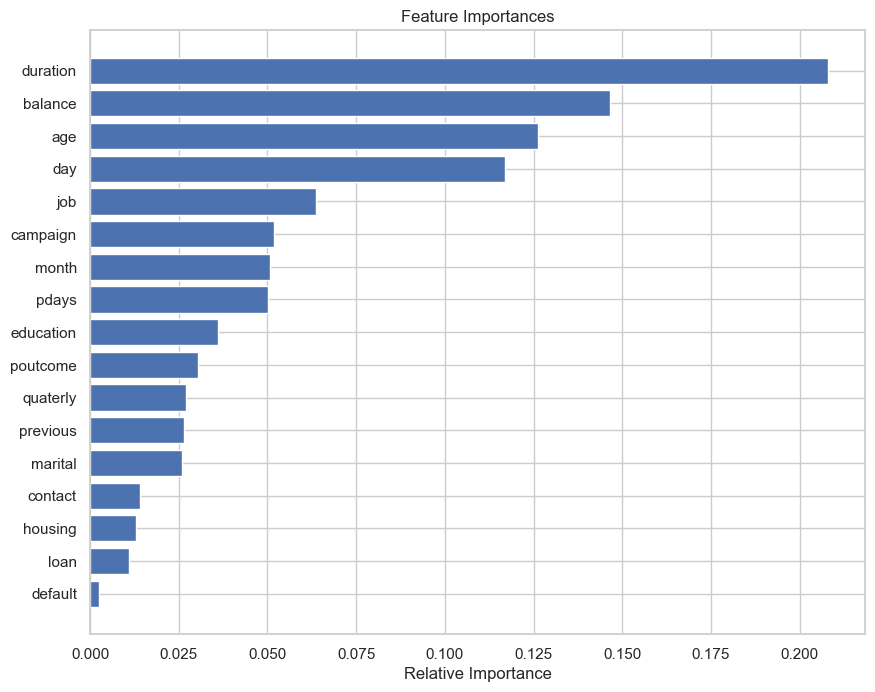

In [134]:
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [135]:
y_pred=model1.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report

In [137]:
confusion_matrix(y_test,y_pred)

array([[11543,   439],
       [  823,   759]], dtype=int64)

In [138]:
f1_score(y_test,y_pred)

0.546043165467626

In [139]:
accuracy_score(y_test,y_pred)

0.9069595989383663

In [102]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95     11982\n           1       0.66      0.43      0.52      1582\n\n    accuracy                           0.91     13564\n   macro avg       0.79      0.70      0.73     13564\nweighted avg       0.90      0.91      0.90     13564\n'

roc_auc_score is:  0.7215670745899718


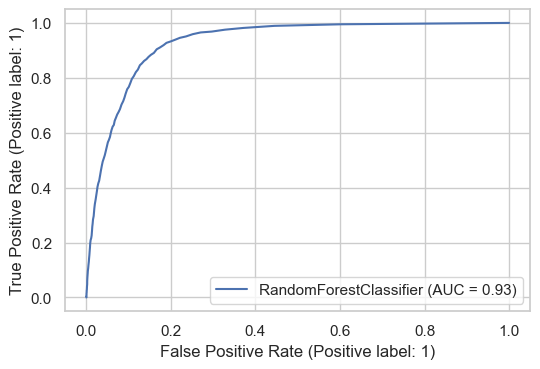

In [146]:
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(model1, X_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, y_pred))

In [142]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
acc = accuracy_score(pred, y_test)
print(classification_report(pred, y_test))
print(acc)

C:\Users\Ramu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12368
           1       0.48      0.64      0.55      1196

    accuracy                           0.91     13564
   macro avg       0.72      0.79      0.75     13564
weighted avg       0.92      0.91      0.91     13564

0.9081391919787674


In [147]:
importances = model1.feature_importances_
indices = np.argsort(importances)

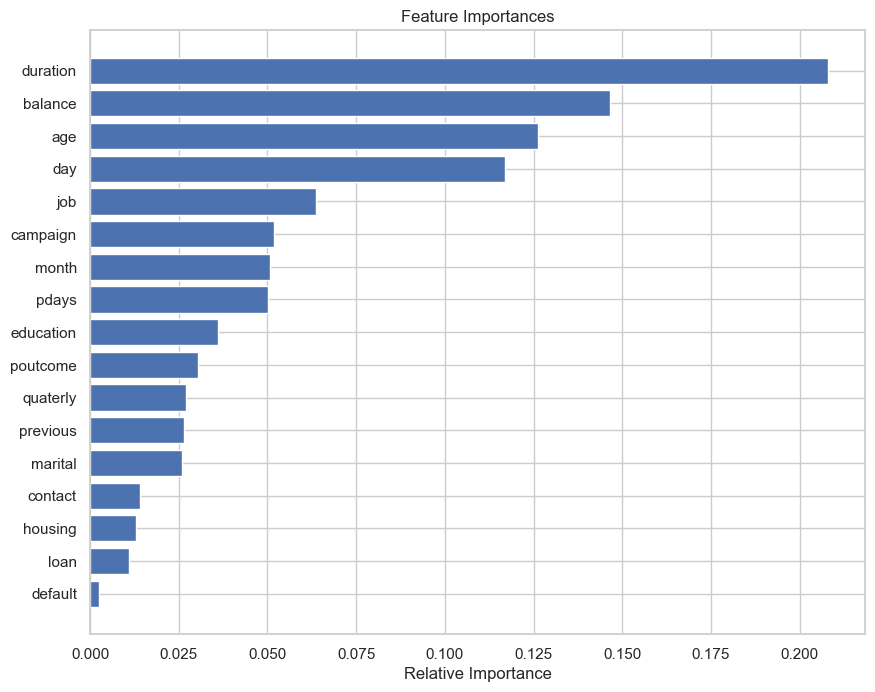

In [148]:
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc_score is:  0.7241550273155203


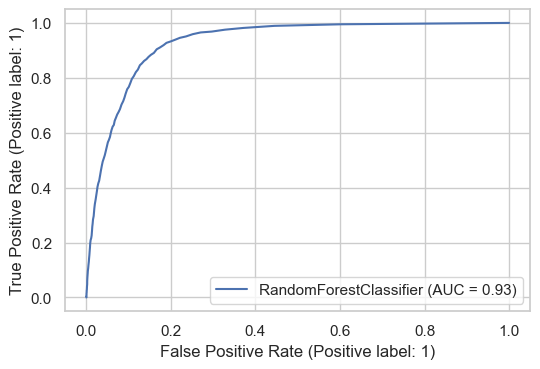

In [145]:
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(model1, X_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, pred))

In [149]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

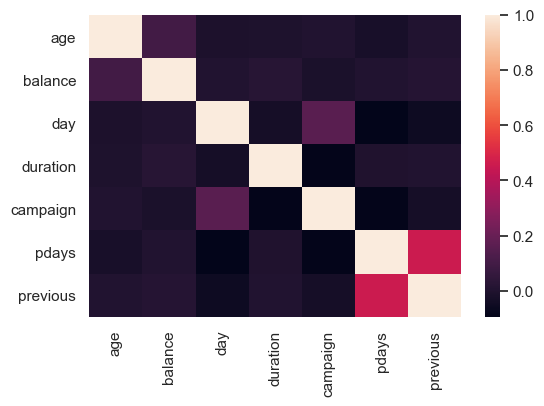

In [150]:
sb.heatmap(data=data.corr())

In [151]:
import tensorflow as tf
import keras

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
sc=StandardScaler()

In [156]:
X_train=sc.fit_transform(X_train)

In [157]:
X_test=sc.transform(X_test)

In [159]:
from keras.models import Sequential

In [161]:
from keras.layers import Dense,Dropout

In [162]:
X.shape

(45211, 17)

In [166]:
model = Sequential()
model.add(Dense(20, input_dim=17, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [171]:
optimizer = keras.optimizers.Adam(lr=0.0009)

C:\Users\Ramu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [172]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [173]:
model.fit(X_train, y_train, epochs=100, batch_size=300,validation_data=(X_test,y_test))

Epoch 1/100
106/106 [==============================] - 3s 10ms/step - loss: 0.2042 - accuracy: 0.9065 - val_loss: 0.2066 - val_accuracy: 0.9048
Epoch 2/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9069 - val_loss: 0.2068 - val_accuracy: 0.9043
Epoch 3/100
106/106 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.9048 - val_loss: 0.2067 - val_accuracy: 0.9045
Epoch 4/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9062 - val_loss: 0.2065 - val_accuracy: 0.9057
Epoch 5/100
106/106 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.9061 - val_loss: 0.2064 - val_accuracy: 0.9053
Epoch 6/100
106/106 [==============================] - 0s 5ms/step - loss: 0.2030 - accuracy: 0.9081 - val_loss: 0.2063 - val_accuracy: 0.9046
Epoch 7/100
106/106 [==============================] - 1s 5ms/step - loss: 0.2047 - accuracy: 0.9090 - val_loss: 0.2068 - val_accuracy: 0.904

Epoch 58/100
106/106 [==============================] - 1s 5ms/step - loss: 0.2006 - accuracy: 0.9097 - val_loss: 0.2057 - val_accuracy: 0.9050
Epoch 59/100
106/106 [==============================] - 0s 5ms/step - loss: 0.2006 - accuracy: 0.9079 - val_loss: 0.2062 - val_accuracy: 0.9049
Epoch 60/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2016 - accuracy: 0.9084 - val_loss: 0.2050 - val_accuracy: 0.9060
Epoch 61/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9062 - val_loss: 0.2053 - val_accuracy: 0.9065
Epoch 62/100
106/106 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9101 - val_loss: 0.2059 - val_accuracy: 0.9058
Epoch 63/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.9108 - val_loss: 0.2055 - val_accuracy: 0.9055
Epoch 64/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.9091 - val_loss: 0.2065 - val_accuracy:

In [174]:
m_predict=model.predict(X_test)

In [179]:
m_predict=(m_predict>0.5)

In [183]:
m_predict=[1 if i==True else 0 for i in m_predict]

In [184]:
confusion_matrix(y_test,m_predict)

array([[11555,   427],
       [  861,   721]], dtype=int64)